In [4]:
# Libraries: Pandas, NumPy, Matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#  Load CSV File

df = pd.read_csv('appointments.csv')

print(df.head())
print(df.info())

  appointment_id patient_id doctor_id appointment_date appointment_time  \
0           A001       P034      D009       2023-08-09         15:15:00   
1           A002       P032      D004       2023-06-09         14:30:00   
2           A003       P048      D004       2023-06-28          8:00:00   
3           A004       P025      D006       2023-09-01          9:15:00   
4           A005       P040      D003       2023-07-06         12:45:00   

  reason_for_visit     status  
0          Therapy  Scheduled  
1          Therapy    No-show  
2     Consultation  Cancelled  
3     Consultation  Cancelled  
4        Emergency    No-show  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   appointment_id    200 non-null    object
 1   patient_id        200 non-null    object
 2   doctor_id         200 non-null    object
 3   appointment_date  

In [6]:
# Basic Data Cleaning

# Convert date and time columns
df['appointment_date'] = pd.to_datetime(df['appointment_date'], errors='coerce')
df['appointment_time'] = pd.to_datetime(df['appointment_time'], format='%H:%M', errors='coerce')

# Remove duplicates
df = df.drop_duplicates()

print("Cleaned Shape:", df.shape)


Cleaned Shape: (200, 7)


No-show      52
Scheduled    51
Cancelled    51
Completed    46
Name: status, dtype: int64


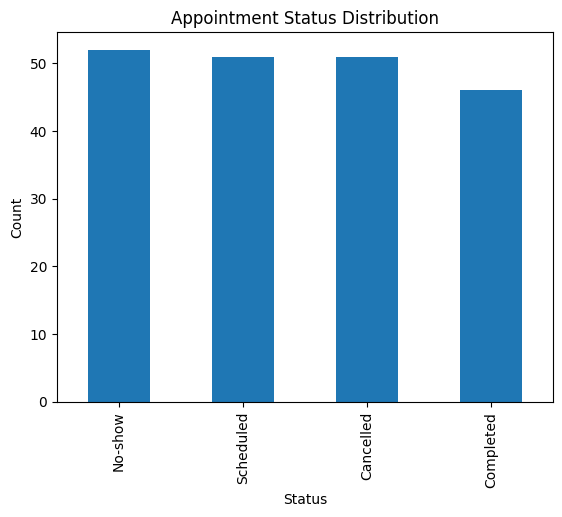

In [7]:
# Appointment Status Distribution

status_counts = df['status'].value_counts()
print(status_counts)

plt.figure()
status_counts.plot(kind='bar')
plt.title('Appointment Status Distribution')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()


In [8]:

#  Overall No-Show Rate

no_show_count = (df['status'] == 'No-show').sum()
total_appointments = len(df)
no_show_rate = (no_show_count / total_appointments) * 100

print("Total Appointments:", total_appointments)
print("No-Show Count:", no_show_count)
print("No-Show Rate (%):", round(no_show_rate, 2))

Total Appointments: 200
No-Show Count: 52
No-Show Rate (%): 26.0


Therapy         15
Consultation    11
Emergency       10
Checkup         10
Follow-up        6
Name: reason_for_visit, dtype: int64


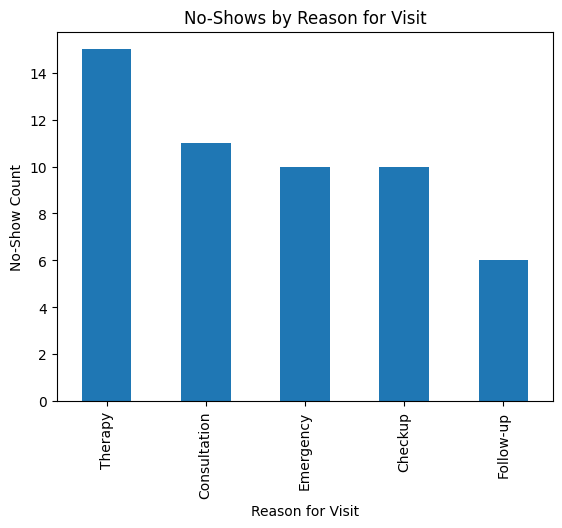

In [9]:

# Reason for Visit vs No-Show

reason_noshow = df[df['status'] == 'No-show']['reason_for_visit'].value_counts()
print(reason_noshow)

plt.figure()
reason_noshow.plot(kind='bar')
plt.title('No-Shows by Reason for Visit')
plt.xlabel('Reason for Visit')
plt.ylabel('No-Show Count')
plt.show()


D005    9
D003    7
D001    7
D009    6
D006    6
D004    5
D010    5
D008    4
D007    2
D002    1
Name: doctor_id, dtype: int64


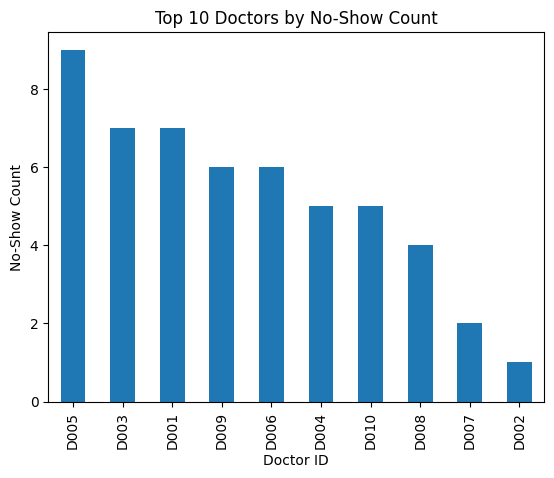

In [10]:
# Doctor-wise No-Show Analysis
doctor_noshow = df[df['status'] == 'No-show']['doctor_id'].value_counts().head(10)
print(doctor_noshow)

plt.figure()
doctor_noshow.plot(kind='bar')
plt.title('Top 10 Doctors by No-Show Count')
plt.xlabel('Doctor ID')
plt.ylabel('No-Show Count')
plt.show()

month
2023-01    20
2023-02    14
2023-03    19
2023-04    25
2023-05    19
2023-06    18
2023-07    16
2023-08    15
2023-09    11
2023-10    14
2023-11    17
2023-12    12
Freq: M, dtype: int64


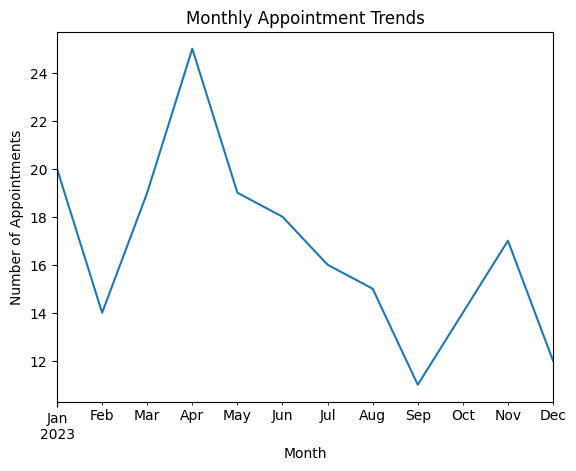

In [11]:

# Monthly Appointment Trends

df['month'] = df['appointment_date'].dt.to_period('M')
monthly_trend = df.groupby('month').size()

print(monthly_trend)

plt.figure()
monthly_trend.plot()
plt.title('Monthly Appointment Trends')
plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.show()


time_slot
Morning      0
Afternoon    0
Evening      0
dtype: int64


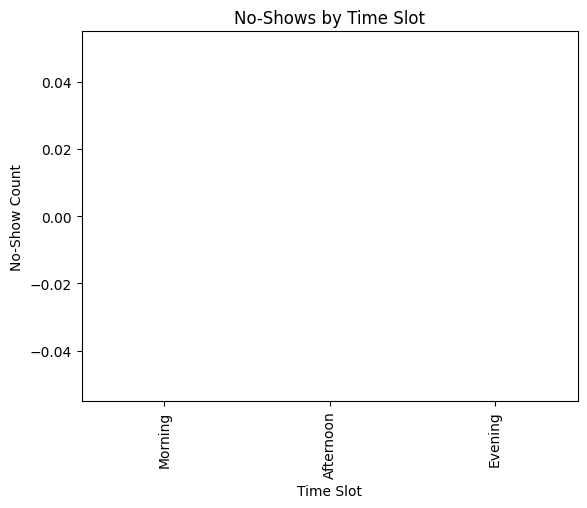

In [14]:

# Time Slot Analysis (FIXED)

df['hour'] = df['appointment_time'].dt.hour

bins = [0, 12, 17, 24]
labels = ['Morning', 'Afternoon', 'Evening']
df['time_slot'] = pd.cut(df['hour'], bins=bins, labels=labels, right=False)

slot_noshow = (
    df[df['status'] == 'No-show']
    .groupby('time_slot')
    .size()
    .reindex(labels, fill_value=0)
)

print(slot_noshow)

plt.figure()
slot_noshow.plot(kind='bar')
plt.title('No-Shows by Time Slot')
plt.xlabel('Time Slot')
plt.ylabel('No-Show Count')
plt.show()


In [13]:

# Social Impact Summary

print("SOCIAL IMPACT INSIGHTS:")
print("1. Identified peak no-show time slots.")
print("2. Found reasons with high missed appointments.")
print("3. Helps hospital improve scheduling and reduce resource waste.")

SOCIAL IMPACT INSIGHTS:
1. Identified peak no-show time slots.
2. Found reasons with high missed appointments.
3. Helps hospital improve scheduling and reduce resource waste.


**This analysis helps hospitals understand attendance behavior, reduce missed appointments, and improve healthcare service efficiency.**